In [86]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
def read_csv(csv_url):
    return pd.read_csv(csv_url)

def is_null(df):
    return df.isnull().sum().sort_values(ascending=False)

def outlier_thresholds(df, col_name, q1 = 0.05, q3 = 0.95 ):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * interquantile_range
    lower_limit = quartile1- 1.5 * interquantile_range
    return lower_limit,upper_limit

def get_outliers(df, col_name):
    # get outlier thresholds
    low, up = outlier_thresholds(df, col_name)
    # Return the outliers
    return df.loc[((df[col_name] < low) | (df[col_name] > up)), col_name]

# Using min-max normalization 
# Range between 0-1
def min_max_norm(df,col):
   return (df[col] - df[col].min()) / (df[col].max() - df[col].min())   

def column_name_replace_space(columns):
  return [col.replace(' ','_') for col in columns]


## Labor datasets

- The labor force is the number of people who are employed plus the unemployed who are looking for work.
- At its most basic level, entrepreneurship refers to an individual or a small group of partners who strike out on an original path to create a new business.
- The labor force participation rate is the proportion of the population aged
15 years and older that is economically active.
- This ratio is calculated by dividing the labor force participation rate among women, by the
corresponding rate for men. 
- https://ourworldindata.org/grapher/ratio-of-female-to-male-labor-force-participation-rates-ilo-wdi

In [88]:
df_ratio_labor = read_csv('data/3-ratio-of-female-to-male-labor-force-participation-rates-ilo-wdi.csv')
df_labor_entp =pd.read_csv('data/Labor-Force-Women-Entrpreneurship.csv',sep=';')
df_labor_female = read_csv('data\Labour-Force-Participation-Female.csv')
df_labor_male = read_csv('data\Labour-Force-Participation-Male.csv')

In [89]:
df_ratio_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6432 entries, 0 to 6431
Data columns (total 4 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6432 non-null   object 
 1   Code                                                                               5984 non-null   object 
 2   Year                                                                               6432 non-null   int64  
 3   Ratio of female to male labor force participation rate (%) (modeled ILO estimate)  6432 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 201.1+ KB


In [90]:
df_ratio_labor.head()

,Entity,Code,Year,Ratio of female to male labor force participation rate (%) (modeled ILO estimate)
0,Afghanistan,AFG,1990,19.604805
1,Afghanistan,AFG,1991,19.713380
2,Afghanistan,AFG,1992,19.803307
3,Afghanistan,AFG,1993,19.844606
4,Afghanistan,AFG,1994,19.884710


In [91]:
df_ratio_labor = df_ratio_labor.rename(columns={"Ratio of female to male labor force participation rate (%) (modeled ILO estimate)": "ratio_of_f_to_m_labor_force_participation_rate"})

In [92]:
# No null values in the important columns
df_ratio_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6432 entries, 0 to 6431
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Entity                                          6432 non-null   object 
 1   Code                                            5984 non-null   object 
 2   Year                                            6432 non-null   int64  
 3   ratio_of_f_to_m_labor_force_participation_rate  6432 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 201.1+ KB


- Labor Force Participation Rate: It indicates the percentage of people who are either currently employed or are unemployed but actively looking for work.

Female to Male Ratio: The ratio of female to male labor force participation rate calculates the proportion of females participating in the labor force relative to males.

- If the ratio is greater than 1, it indicates that a higher proportion of females are participating in the labor force compared to males. This might suggest a higher level of gender equality or a greater need for females to contribute to the labor force in that particular context.

- If the ratio is less than 1, it indicates that a lower proportion of females are participating in the labor force compared to males. This could suggest gender disparities or cultural, social, or economic factors that limit female participation in the labor force.

- If the ratio is equal to 1, it suggests that there is gender parity in labor force participation, meaning that the proportions of females and males participating in the labor force are equal.

In [93]:
# Year between 1990-2021
# Because most of the data the ratio percentange smaller than 100 male labor participation higher than females
df_ratio_labor.describe()

,Year,ratio_of_f_to_m_labor_force_participation_rate
count,6432.00000,6432.000000
mean,2005.50000,68.871932
std,9.23381,19.953260
min,1990.00000,8.863492
25%,1997.75000,57.790668
50%,2005.50000,73.685340
75%,2013.25000,83.291803
max,2021.00000,108.371530


In [94]:
# There are 201 countries
df_ratio_labor.nunique()

Entity                                             201
Code                                               187
Year                                                32
ratio_of_f_to_m_labor_force_participation_rate    6430
dtype: int64

In [95]:
df_ratio_labor['Entity'].value_counts()

Entity
Afghanistan      32
Panama           32
New Zealand      32
Nicaragua        32
Niger            32
                 ..
Guam             32
Guatemala        32
Guinea           32
Guinea-Bissau    32
Zimbabwe         32
Name: count, Length: 201, dtype: int64

In [96]:
# Every country has 32 year data
(df_ratio_labor['Entity'].value_counts() == 32).all()

True

In [97]:
# Acsessing the Turkey data
df_ratio_labor.query('Entity ==  "Turkey"')

,Entity,Code,Year,ratio_of_f_to_m_labor_force_participation_rate
5824,Turkey,TUR,1990,42.847683
5825,Turkey,TUR,1991,42.537180
5826,Turkey,TUR,1992,41.084686
5827,Turkey,TUR,1993,34.333405
5828,Turkey,TUR,1994,39.852276
5829,Turkey,TUR,1995,39.753010
5830,Turkey,TUR,1996,39.526590
5831,Turkey,TUR,1997,37.551370
5832,Turkey,TUR,1998,38.128390
5833,Turkey,TUR,1999,39.564970


<Axes: xlabel='ratio_of_f_to_m_labor_force_participation_rate'>

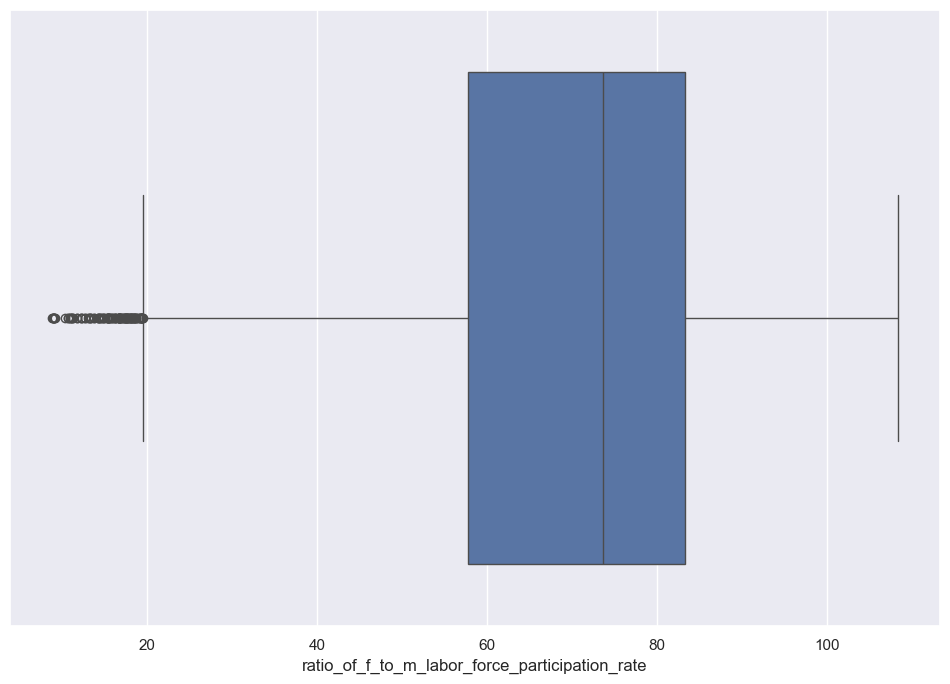

In [98]:
# Most of the data has 60-85 ratio
# We can see thre is so little data that female participation equal or higher than male participation

plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.boxplot(df_ratio_labor['ratio_of_f_to_m_labor_force_participation_rate'],orient='h')

C:\Users\HP\AppData\Local\Temp\ipykernel_9964\3996675178.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ratio_labor.query('ratio_of_f_to_m_labor_force_participation_rate > 100 | ratio_of_f_to_m_labor_force_participation_rate < 20 ').sort_values(by = ['ratio_of_f_to_m_labor_force_participation_rate'],ascending=False), y="Entity", x="ratio_of_f_to_m_labor_force_participation_rate",palette='dark'


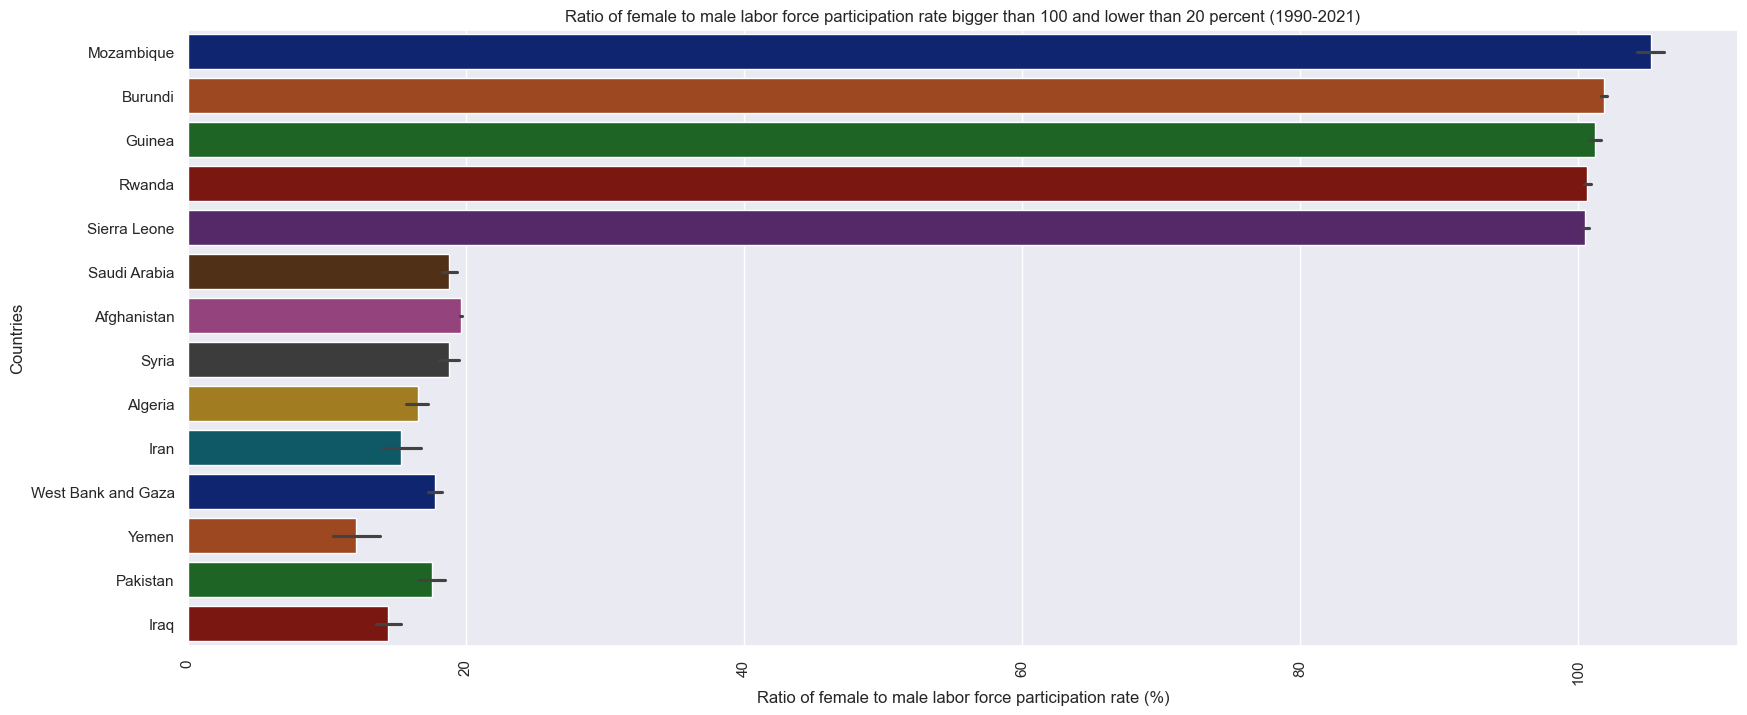

In [99]:
plt.figure(figsize=(20,8))
plt.title('Ratio of female to male labor force participation rate bigger than 100 and lower than 20 percent (1990-2021)')
plt.xlabel('Ratio of female to male labor force participation rate (%)')
plt.ylabel('Countries')
plt.xticks(rotation=90)
sns.barplot(data=df_ratio_labor.query('ratio_of_f_to_m_labor_force_participation_rate > 100 | ratio_of_f_to_m_labor_force_participation_rate < 20 ').sort_values(by = ['ratio_of_f_to_m_labor_force_participation_rate'],ascending=False), y="Entity", x="ratio_of_f_to_m_labor_force_participation_rate",palette='dark'
            ,orient='h'
            
)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9964\2487284488.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ratio_labor.query('ratio_of_f_to_m_labor_force_participation_rate > 90').sort_values(by = ['ratio_of_f_to_m_labor_force_participation_rate'],ascending=False), y="Entity", x="ratio_of_f_to_m_labor_force_participation_rate",palette='dark'


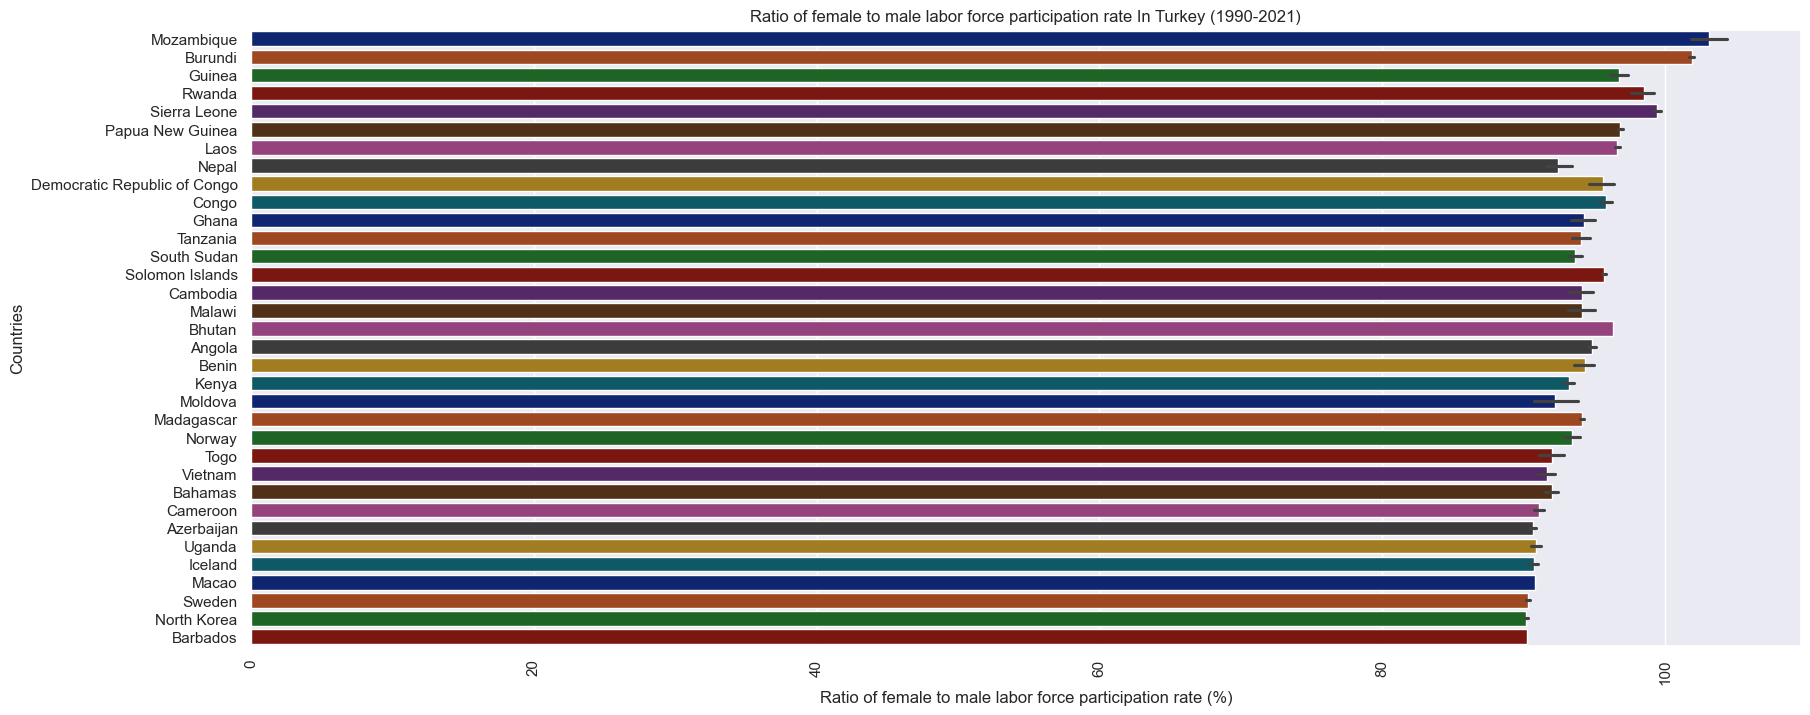

In [100]:
plt.figure(figsize=(20,8))
plt.title('Ratio of female to male labor force participation rate In Turkey (1990-2021)')
plt.xlabel('Ratio of female to male labor force participation rate (%)')
plt.ylabel('Countries')
plt.xticks(rotation=90)
sns.barplot(data=df_ratio_labor.query('ratio_of_f_to_m_labor_force_participation_rate > 90').sort_values(by = ['ratio_of_f_to_m_labor_force_participation_rate'],ascending=False), y="Entity", x="ratio_of_f_to_m_labor_force_participation_rate",palette='dark'
            ,orient='h'
            
)
plt.show()

In [101]:
df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby(by='Entity').mean().iloc[0].values[0]

21.5770318125

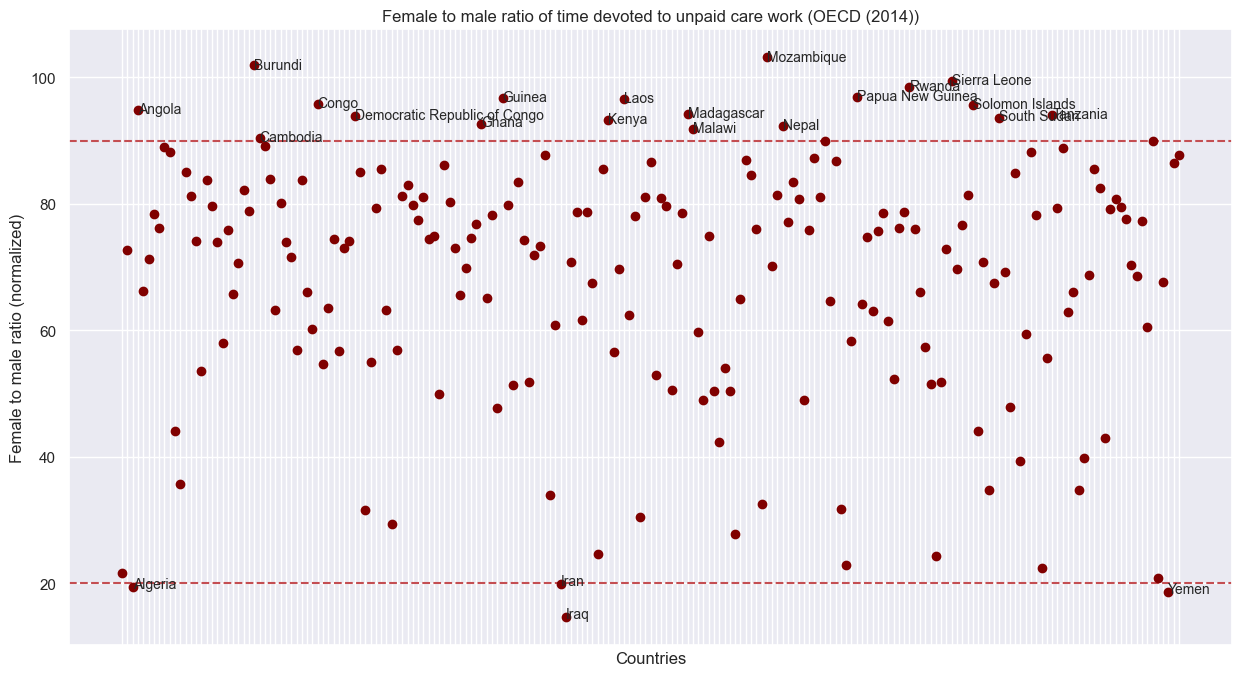

In [102]:
plt.figure(figsize=(15,8))
plt.title('Female to male ratio of time devoted to unpaid care work (OECD (2014))')
plt.ylabel('Female to male ratio (normalized)')
plt.xlabel('Countries')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)
plt.axhline(y=20, color='r', linestyle='--')
plt.axhline(y=90, color='r', linestyle='--')

for i in range(len(df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby('Entity').mean())):
    x = df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby(by='Entity').mean().iloc[i].name
    y = df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby(by='Entity').mean().iloc[i].values[0]
    plt.plot(x, y, "o", color="maroon")
    if df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby(by='Entity').mean().iloc[i].values[0] >= 90 or \
    df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby(by='Entity').mean().iloc[i].values[0] <= 20 :
        plt.text(x, y * (1 - 0.005), df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby(by='Entity').mean().iloc[i].name, fontsize=10)
  
plt.show()

<Axes: title={'center': 'Ratio of female to male labor force participation rate In Different Countries (1990-2021)'}, xlabel='Year', ylabel='Ratio of female to male labor force participation rate (%)'>

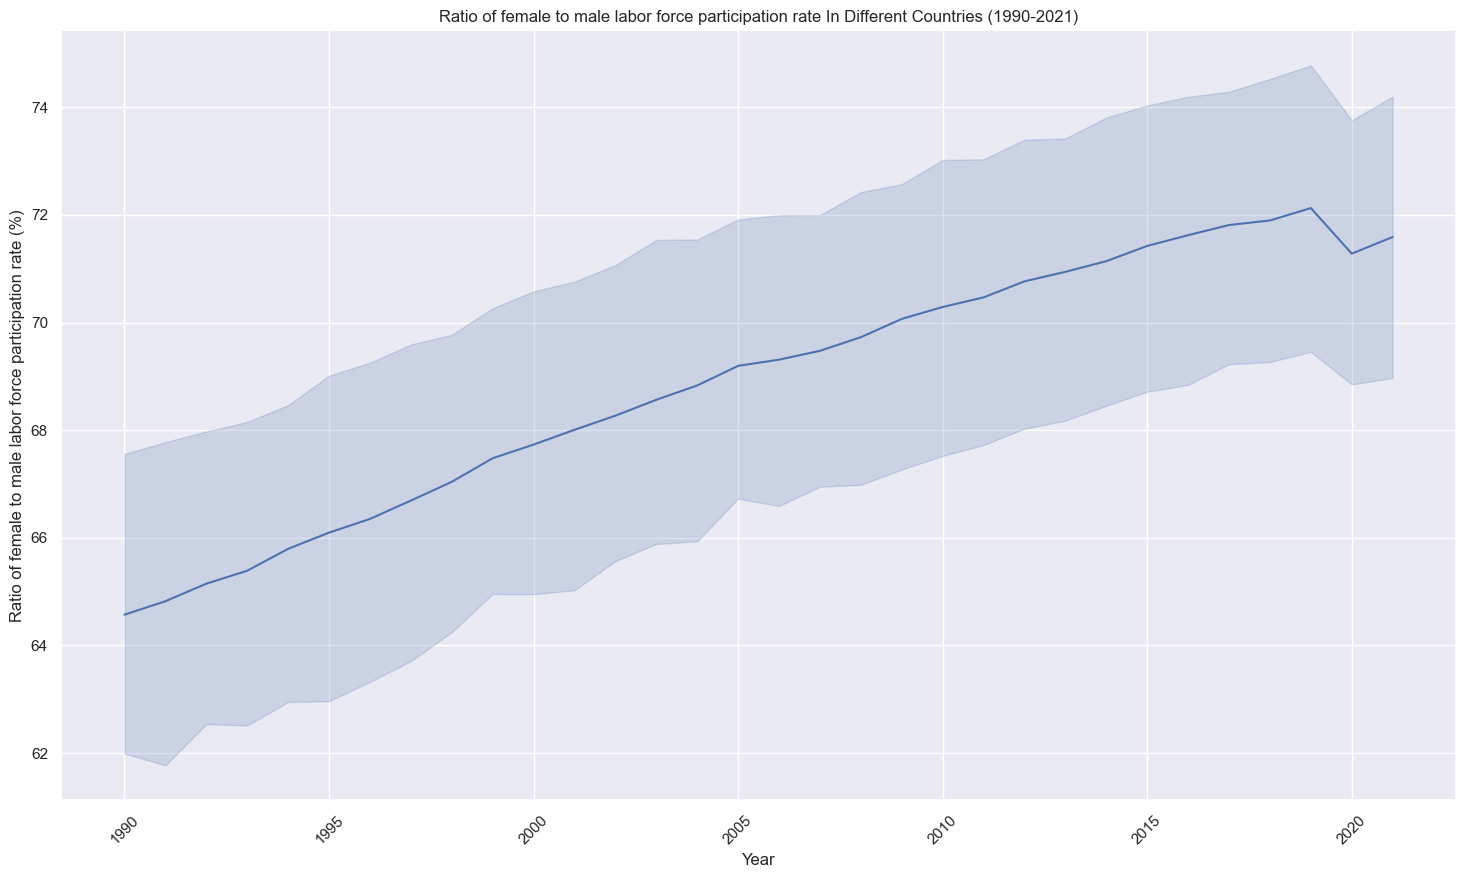

In [103]:
# In 2019-2020 rates dropped a little
# Probably because of COVID-19
plt.figure(figsize=(18,10))
plt.title('Ratio of female to male labor force participation rate In Different Countries (1990-2021)')
plt.ylabel('Ratio of female to male labor force participation rate (%)')
plt.xlabel('Year')
plt.xticks(rotation=45)
sns.lineplot(data=df_ratio_labor,y="ratio_of_f_to_m_labor_force_participation_rate", x="Year")

<Axes: title={'center': 'Ratio of female to male labor force participation rate In Turkey (1990-2021)'}, xlabel='Year', ylabel='Ratio of female to male labor force participation rate (%)'>

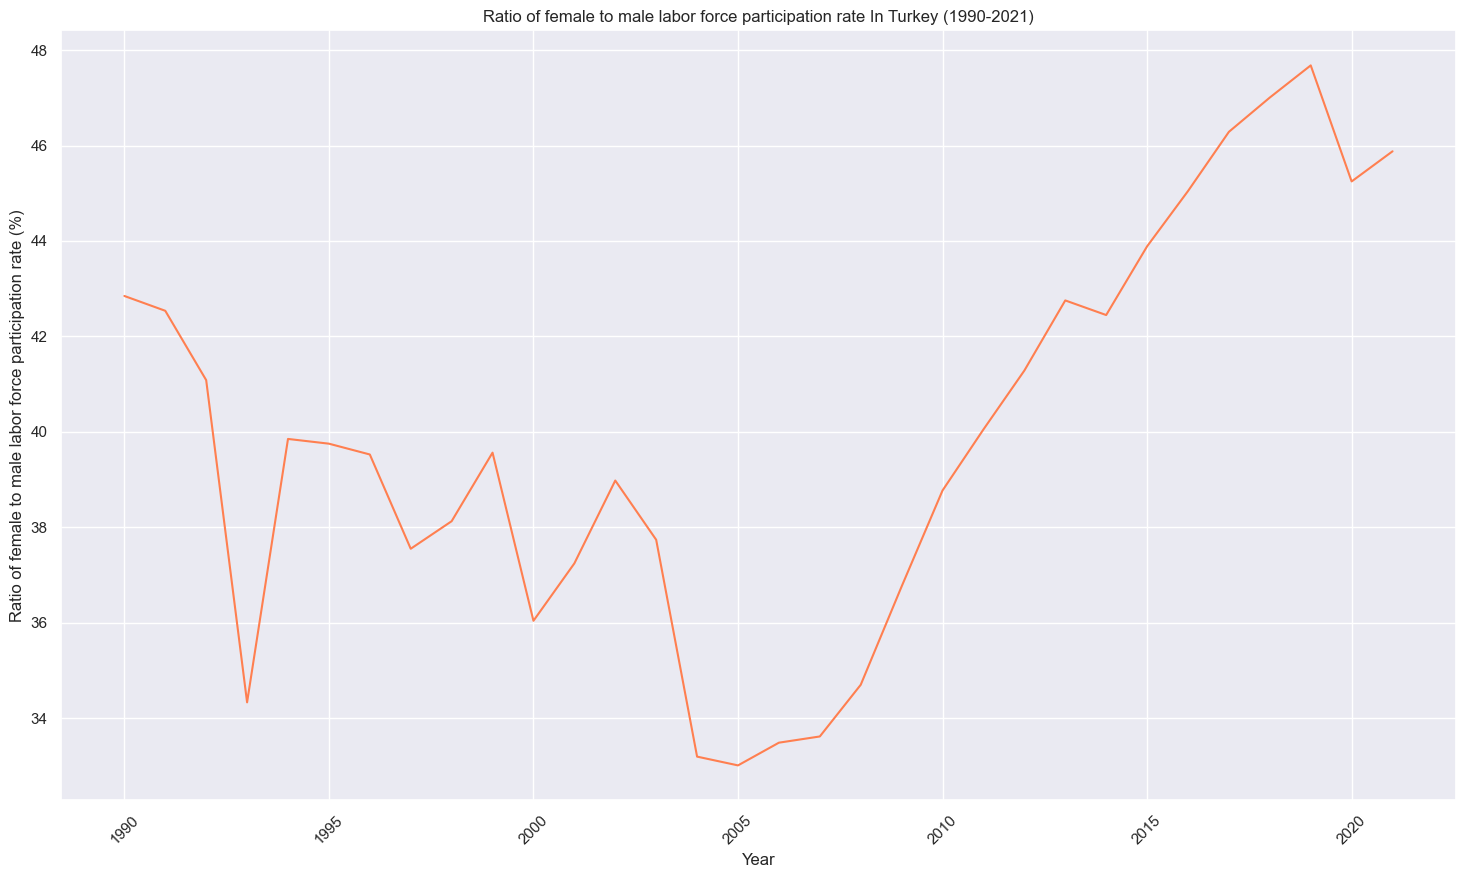

In [104]:
plt.figure(figsize=(18,10))
plt.title('Ratio of female to male labor force participation rate In Turkey (1990-2021)')
plt.ylabel('Ratio of female to male labor force participation rate (%)')
plt.xlabel('Year')
plt.xticks(rotation=45)
sns.lineplot(data=df_ratio_labor.query('Entity ==  "Turkey"'),y="ratio_of_f_to_m_labor_force_participation_rate", x="Year",
             color='coral')


- Hemisphere: This column categorizes countries based on their geographical hemispheres, such as "Northern Hemisphere" or "Southern Hemisphere."

- HDI Rank (2021): This column represents the Human Development Index (HDI) rank of each country for the year 2021.The HDI is a composite index measuring average achievement in three basic dimensions of human development: health (life expectancy at birth), education (mean years of schooling and expected years of schooling), and standard of living (gross national income per capita). The HDI is the geometric mean of normalized indices for each of the three dimensions. A country scores a higher level of HDI when the lifespan is higher, the education level is higher, and the gross national income GNI (PPP) per capita is higher.A lower rank indicates higher human development.

In [105]:
df_labor_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 37 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   ISO3                                                                195 non-null    object 
 1   Country                                                             195 non-null    object 
 2   Continent                                                           195 non-null    object 
 3   Hemisphere                                                          195 non-null    object 
 4   HDI Rank (2021)                                                     191 non-null    float64
 5   Labour force participation rate, male (% ages 15 and older) (1990)  180 non-null    float64
 6   Labour force participation rate, male (% ages 15 and older) (1991)  180 non-null    float64
 7   Labour force part

In [106]:
df_labor_male.columns =[col.replace(r"Labour force participation rate, male (% ages 15 and older) ","") for col in df_labor_male.columns]
df_labor_female.columns =[col.replace(r"Labour force participation rate, female (% ages 15 and older) ","") for col in df_labor_female.columns]

In [107]:
df_labor_female.head()

,ISO3,Country,Continent,Hemisphere,HDI Rank (2021),(1990),(1991),(1992),(1993),(1994),...,(2012),(2013),(2014),(2015),(2016),(2017),(2018),(2019),(2020),(2021)
0,AFG,Afghanistan,Asia,Northern Hemisphere,180.0,15.180,15.214,15.223,15.197,15.178,...,15.879,16.794,17.749,18.746,19.798,20.887,21.228,21.566,16.189,14.848
1,AGO,Angola,Africa,Southern Hemisphere,148.0,75.408,75.381,75.369,75.371,75.387,...,74.834,74.833,74.843,74.864,74.882,74.912,74.955,75.011,73.618,73.968
2,ALB,Albania,Europe,Northern Hemisphere,67.0,51.364,54.727,55.608,54.638,53.825,...,48.778,43.598,43.733,46.898,49.676,49.510,51.189,52.723,49.786,50.733
3,AND,Andorra,Europe,Northern Hemisphere,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,26.0,29.083,29.779,30.272,30.944,31.121,...,44.718,46.190,47.659,49.072,50.373,51.947,48.951,48.923,45.703,46.542


In [108]:
# Define the columns that you want to keep as identifiers
id_columns = ['ISO3', 'Country', 'Continent', 'Hemisphere', 'HDI Rank (2021)']

# Perform melting/unpivoting
df_labor_male_melted = pd.melt(df_labor_male, 
                    id_vars=id_columns, 
                    var_name='Year', 
                    value_name='Labour force participation rate')

df_labor_female_melted = pd.melt(df_labor_female, 
                    id_vars=id_columns, 
                    var_name='Year', 
                    value_name='Labour force participation rate')

# Extract the year from the Year column and convert it to integer
df_labor_male_melted['Year'] = df_labor_male_melted['Year'].str.extract(r"(\d+)").astype(int)
df_labor_female_melted['Year'] = df_labor_female_melted['Year'].str.extract(r"(\d+)").astype(int)


# Reorder the columns
df_labor_male_melted = df_labor_male_melted[['ISO3', 'Country', 'Year','Continent', 'Hemisphere', 'HDI Rank (2021)', 'Labour force participation rate']]
df_labor_female_melted = df_labor_female_melted[['ISO3', 'Country', 'Year','Continent', 'Hemisphere', 'HDI Rank (2021)', 'Labour force participation rate']]

# Sort the dataframe by country and year
df_labor_male_melted = df_labor_male_melted.sort_values(by=['Country', 'Year'])
df_labor_female_melted = df_labor_female_melted.sort_values(by=['Country', 'Year'])


# Reset index
df_labor_male_melted =df_labor_male_melted.reset_index(drop=True)
df_labor_female_melted =df_labor_female_melted.reset_index(drop=True)

# Change column names
df_labor_male_melted.columns = column_name_replace_space(df_labor_male_melted.columns)
df_labor_female_melted.columns = column_name_replace_space(df_labor_female_melted.columns)

In [109]:
df_labor_female_melted['Gender'] = 'F'
df_labor_male_melted['Gender'] = 'M'

In [110]:
df_labor_force_merged = pd.concat([df_labor_female_melted,df_labor_male_melted])

In [111]:
df_labor_force_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12480 entries, 0 to 6239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ISO3                             12480 non-null  object 
 1   Country                          12480 non-null  object 
 2   Year                             12480 non-null  int32  
 3   Continent                        12480 non-null  object 
 4   Hemisphere                       12480 non-null  object 
 5   HDI_Rank_(2021)                  12224 non-null  float64
 6   Labour_force_participation_rate  11520 non-null  float64
 7   Gender                           12480 non-null  object 
dtypes: float64(2), int32(1), object(5)
memory usage: 828.8+ KB


In [112]:
df_labor_force_merged.head()

,ISO3,Country,Year,Continent,Hemisphere,HDI_Rank_(2021),Labour_force_participation_rate,Gender
0,AFG,Afghanistan,1990,Asia,Northern Hemisphere,180.0,15.180,F
1,AFG,Afghanistan,1991,Asia,Northern Hemisphere,180.0,15.214,F
2,AFG,Afghanistan,1992,Asia,Northern Hemisphere,180.0,15.223,F
3,AFG,Afghanistan,1993,Asia,Northern Hemisphere,180.0,15.197,F
4,AFG,Afghanistan,1994,Asia,Northern Hemisphere,180.0,15.178,F


In [113]:
is_null(df_labor_force_merged)

Labour_force_participation_rate    960
HDI_Rank_(2021)                    256
ISO3                                 0
Country                              0
Year                                 0
Continent                            0
Hemisphere                           0
Gender                               0
dtype: int64

In [114]:
# I searched multiple sources but there is no data about this countries
df_labor_force_merged[df_labor_force_merged['Labour_force_participation_rate'].isnull()]['Country'].unique()

array(['Andorra', 'Antigua and Barbuda', 'Dominica', 'Grenada',
       'Kiribati', 'Liechtenstein', 'Marshall Islands', 'Micronesia',
       'Monaco', 'Nauru', 'Palau', 'Saint Kitts and Nevis', 'San Marino',
       'Seychelles', 'Tuvalu'], dtype=object)

In [115]:
# I searched multiple sources but there is no data about this countries
df_labor_force_merged[df_labor_force_merged["HDI_Rank_(2021)"].isnull()]['Country'].unique()

array(['Monaco', 'Nauru', 'North Korea', 'Somalia'], dtype=object)

In [116]:
df_labor_force_merged.query('Country == "Palau"')

,ISO3,Country,Year,Continent,Hemisphere,HDI_Rank_(2021),Labour_force_participation_rate,Gender
4192,PLW,Palau,1990,Oceania,Northern Hemisphere,80.0,NaN,F
4193,PLW,Palau,1991,Oceania,Northern Hemisphere,80.0,NaN,F
4194,PLW,Palau,1992,Oceania,Northern Hemisphere,80.0,NaN,F
4195,PLW,Palau,1993,Oceania,Northern Hemisphere,80.0,NaN,F
4196,PLW,Palau,1994,Oceania,Northern Hemisphere,80.0,NaN,F
...,...,...,...,...,...,...,...,...
4219,PLW,Palau,2017,Oceania,Northern Hemisphere,80.0,NaN,M
4220,PLW,Palau,2018,Oceania,Northern Hemisphere,80.0,NaN,M
4221,PLW,Palau,2019,Oceania,Northern Hemisphere,80.0,NaN,M
4222,PLW,Palau,2020,Oceania,Northern Hemisphere,80.0,NaN,M


In [117]:
df_labor_entp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


- Level of development: countries based on their level of development

- European Union Membership: whether the country is a member of the European Union (EU) or not

- Currency: This column likely specifies the currency used in each country

- Women Entrepreneurship Index: Women Entrepreneurship Index (WEI) for each country. It quantifies the conditions favorable or unfavorable for female entrepreneurs within each country. The values are typically between 0 and 100, with higher values indicating a more favorable environment for women entrepreneurs.

- Entrepreneurship Index: Entrepreneurship Index (EI) for each country. It assesses the overall entrepreneurial environment within each country, regardless of gender. Similar to the Women Entrepreneurship Index, the values are typically between 0 and 100, with higher values indicating a more favorable environment for entrepreneurship.

- Inflation rate: inflation rate for each country. Inflation rate measures the percentage change in the general price level of goods and services over a period of time. 

- Female Labor Force Participation Rate: percentage of women who are actively participating in the labor force within each country. It measures the proportion of women who are either employed or actively seeking employment. 

In [118]:
df_labor_entp.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [119]:
df_labor_entp.columns = column_name_replace_space(df_labor_entp.columns)

In [121]:
df_labor_entp['Entrepreneurship_Index_Difference'] = df_labor_entp['Entrepreneurship_Index'] - df_labor_entp['Women_Entrepreneurship_Index']


In [125]:
# Reordering columns
df_labor_entp = df_labor_entp[['No', 'Country', 'Level_of_development', 'European_Union_Membership',
       'Currency', 'Entrepreneurship_Index','Women_Entrepreneurship_Index', 'Entrepreneurship_Index_Difference',
       'Inflation_rate', 'Female_Labor_Force_Participation_Rate']]

In [126]:
df_labor_entp.describe()

,No,Entrepreneurship_Index,Women_Entrepreneurship_Index,Entrepreneurship_Index_Difference,Inflation_rate,Female_Labor_Force_Participation_Rate
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,29.980392,47.241176,47.835294,-0.594118,2.587647,58.481765
std,18.017203,16.193149,14.268480,6.570949,5.380639,13.864567
min,1.000000,24.800000,25.300000,-12.700000,-2.250000,13.000000
25%,14.500000,31.900000,36.350000,-4.000000,-0.500000,55.800000
50%,30.000000,42.700000,44.500000,-1.000000,0.600000,61.000000
75%,45.500000,65.400000,59.150000,2.600000,3.600000,67.400000
max,60.000000,77.600000,74.800000,15.700000,26.500000,82.300000


Text(0.5, 1.0, 'Detecting Outliers with Boxplots')

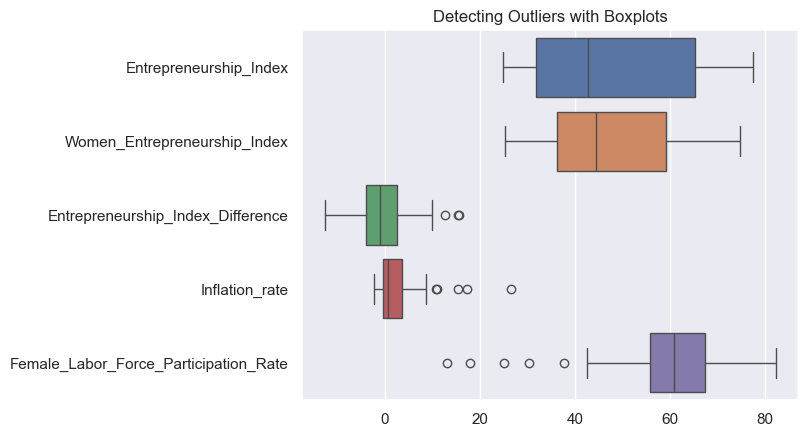

In [129]:
sns.set_theme(style="darkgrid")
sns.boxplot( data=df_labor_entp.drop('No',axis=1),orient='h')
plt.title('Detecting Outliers with Boxplots')


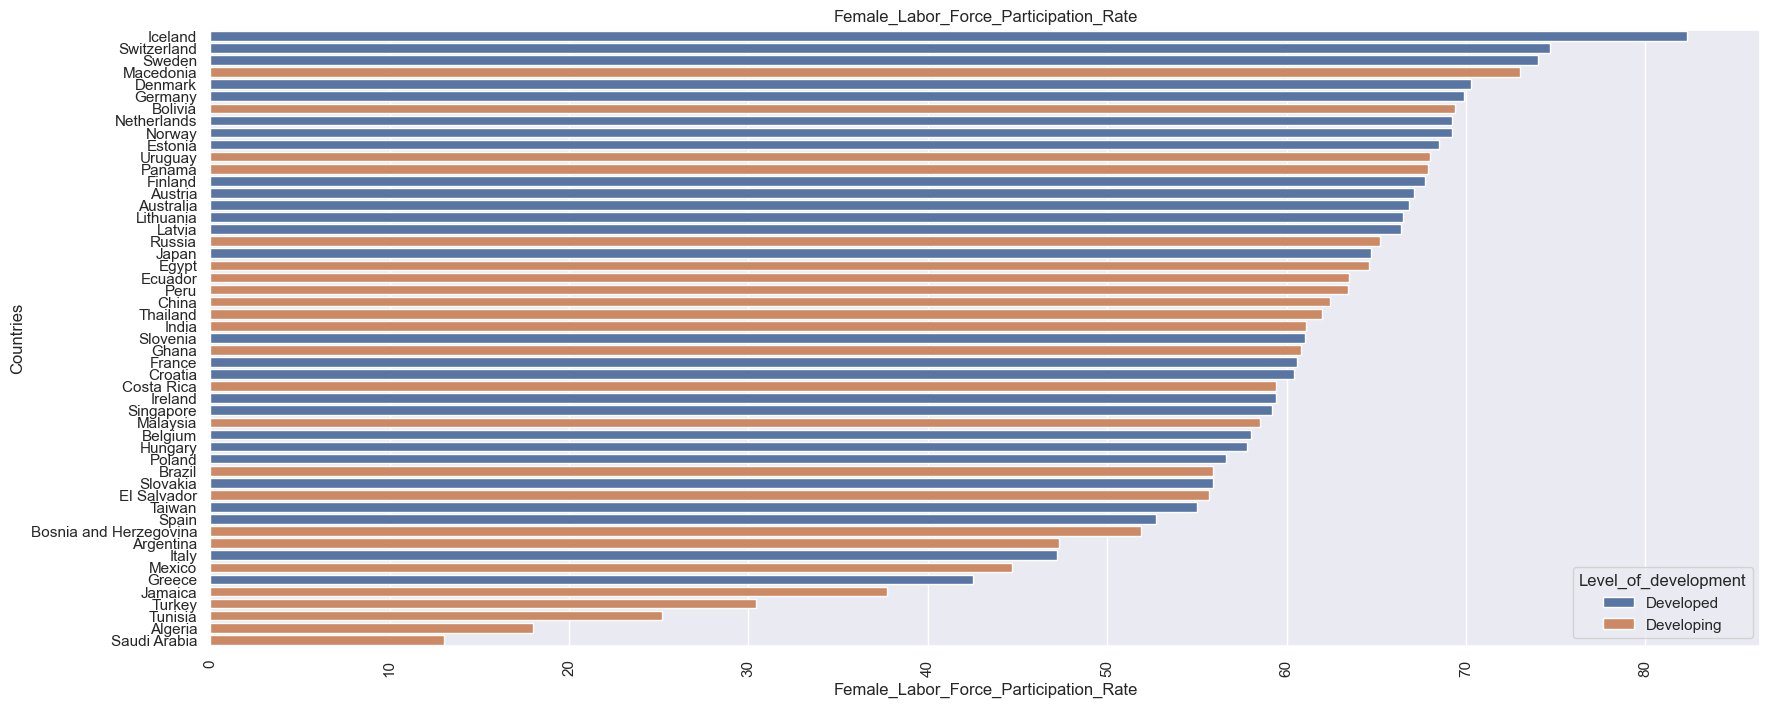

In [142]:
plt.figure(figsize=(20,8))
plt.title('Female_Labor_Force_Participation_Rate')
plt.xlabel('Female_Labor_Force_Participation_Rate')
plt.ylabel('Countries')
plt.xticks(rotation=90)
sns.barplot(data=df_labor_entp.sort_values(by='Female_Labor_Force_Participation_Rate', ascending=False),x='Female_Labor_Force_Participation_Rate',y='Country'
            ,hue='Level_of_development'
            ,orient='h'
            
)
plt.show()

In [134]:
df_labor_entp.columns

Index(['No', 'Country', 'Level_of_development', 'European_Union_Membership',
       'Currency', 'Entrepreneurship_Index', 'Women_Entrepreneurship_Index',
       'Entrepreneurship_Index_Difference', 'Inflation_rate',
       'Female_Labor_Force_Participation_Rate'],
      dtype='object')

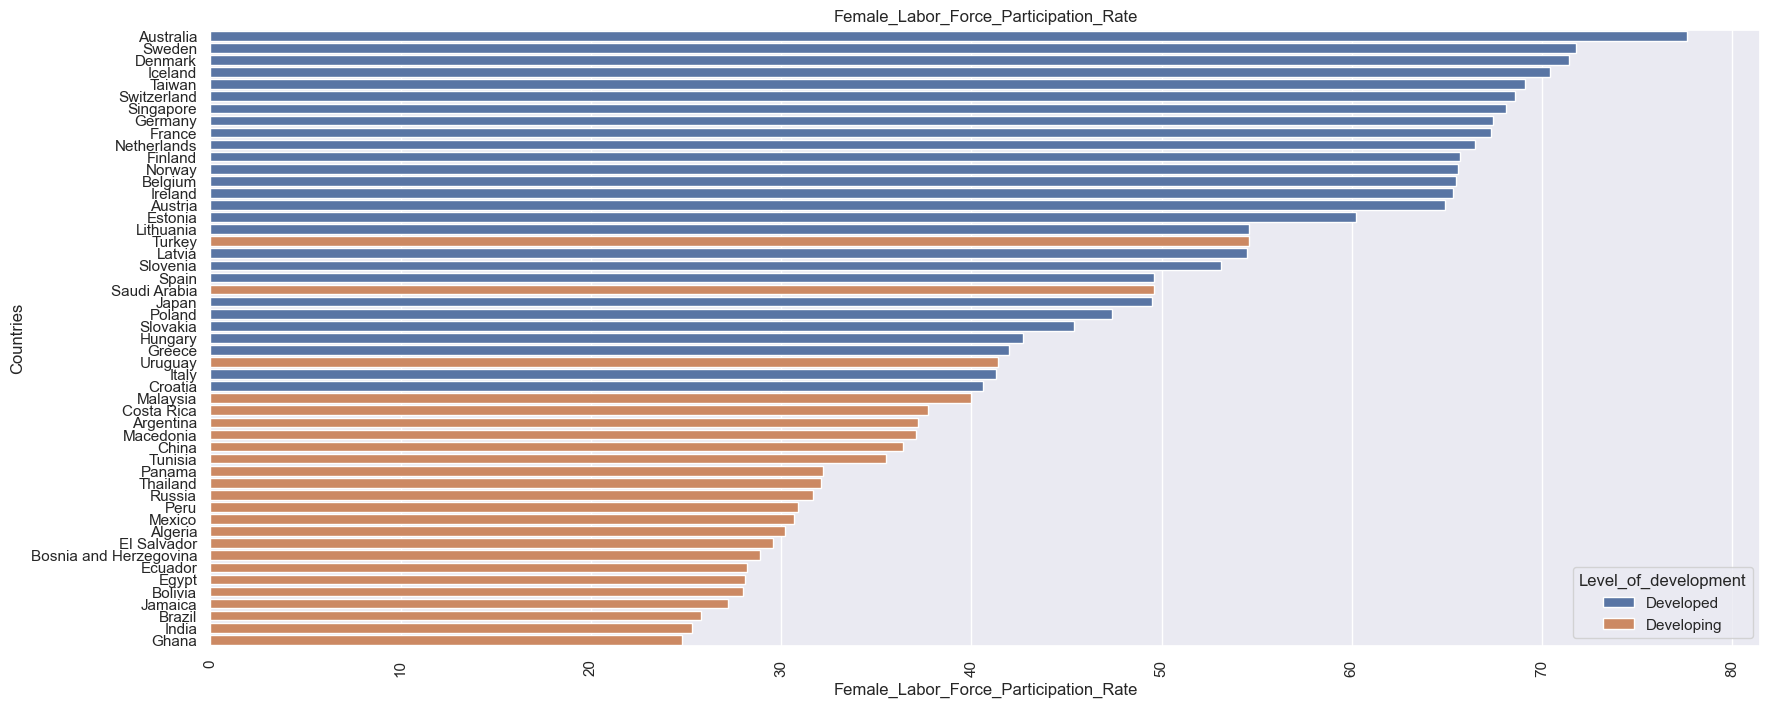

In [135]:
plt.figure(figsize=(20,8))
plt.title('Female_Labor_Force_Participation_Rate')
plt.xlabel('Female_Labor_Force_Participation_Rate')
plt.ylabel('Countries')
plt.xticks(rotation=90)
sns.barplot(data=df_labor_entp.sort_values(by='Entrepreneurship_Index', ascending=False),x='Entrepreneurship_Index',y='Country'
            ,hue='Level_of_development'
            ,orient='h'
            
)
plt.show()

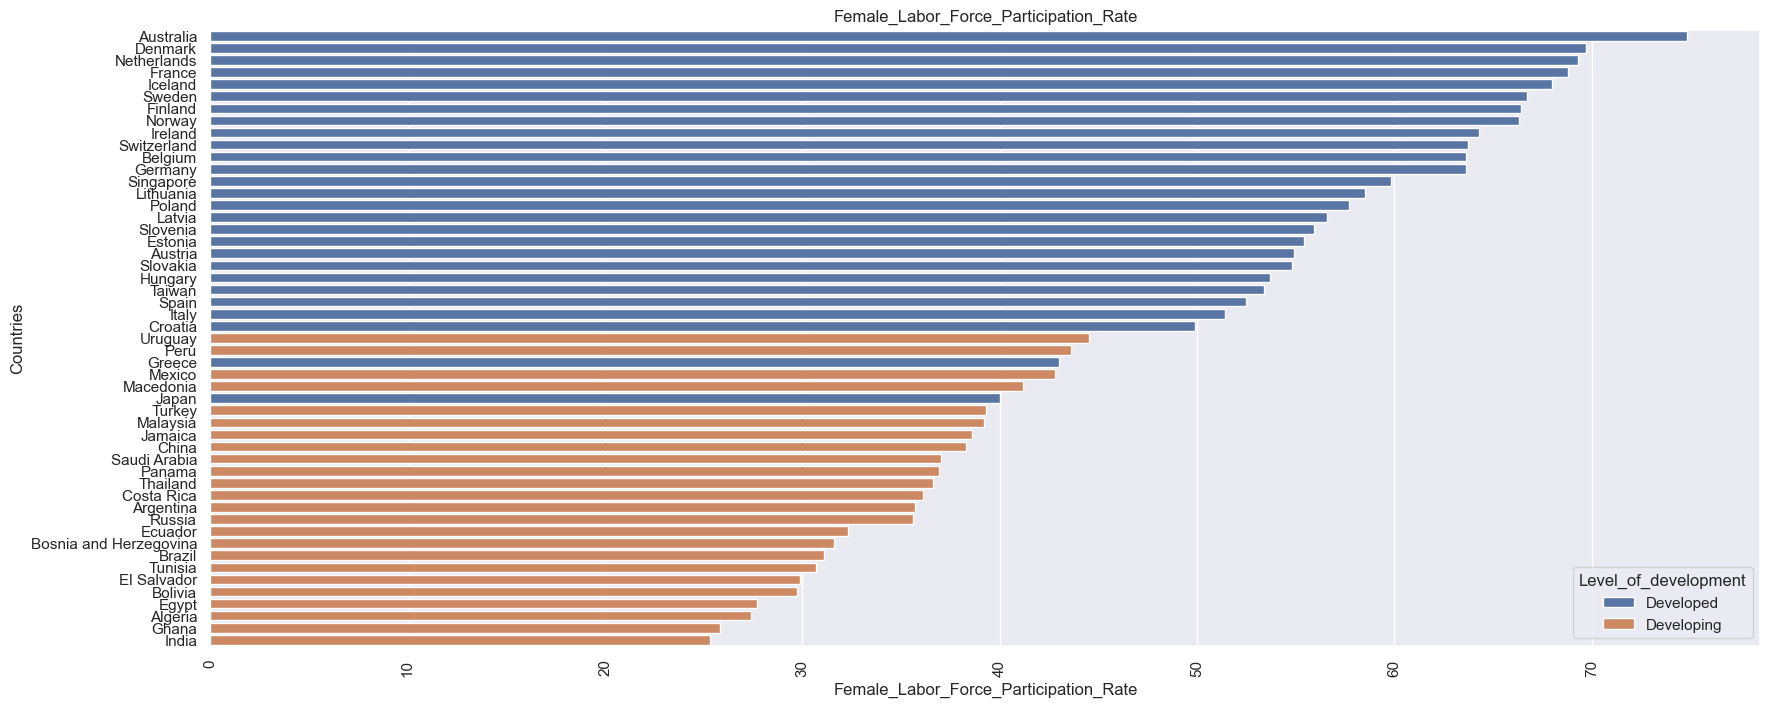

In [136]:
plt.figure(figsize=(20,8))
plt.title('Female_Labor_Force_Participation_Rate')
plt.xlabel('Female_Labor_Force_Participation_Rate')
plt.ylabel('Countries')
plt.xticks(rotation=90)
sns.barplot(data=df_labor_entp.sort_values(by='Women_Entrepreneurship_Index', ascending=False),x='Women_Entrepreneurship_Index',y='Country'
            ,hue='Level_of_development'
            ,orient='h'
            
)
plt.show()

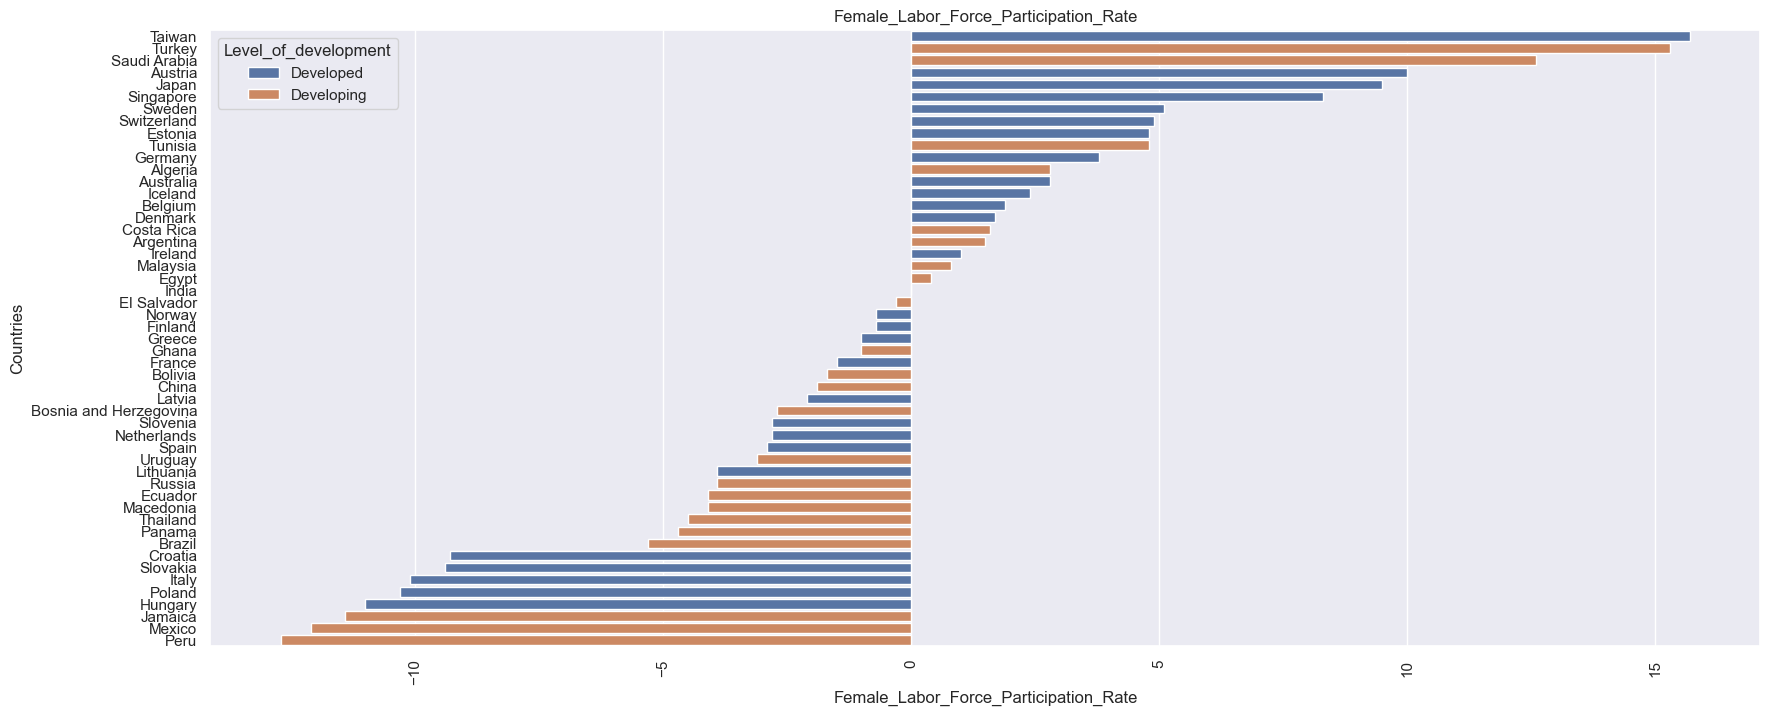

In [137]:
plt.figure(figsize=(20,8))
plt.title('Female_Labor_Force_Participation_Rate')
plt.xlabel('Female_Labor_Force_Participation_Rate')
plt.ylabel('Countries')
plt.xticks(rotation=90)
sns.barplot(data=df_labor_entp.sort_values(by='Entrepreneurship_Index_Difference', ascending=False),x='Entrepreneurship_Index_Difference',y='Country'
            ,hue='Level_of_development'
            ,orient='h'
            
)
plt.show()

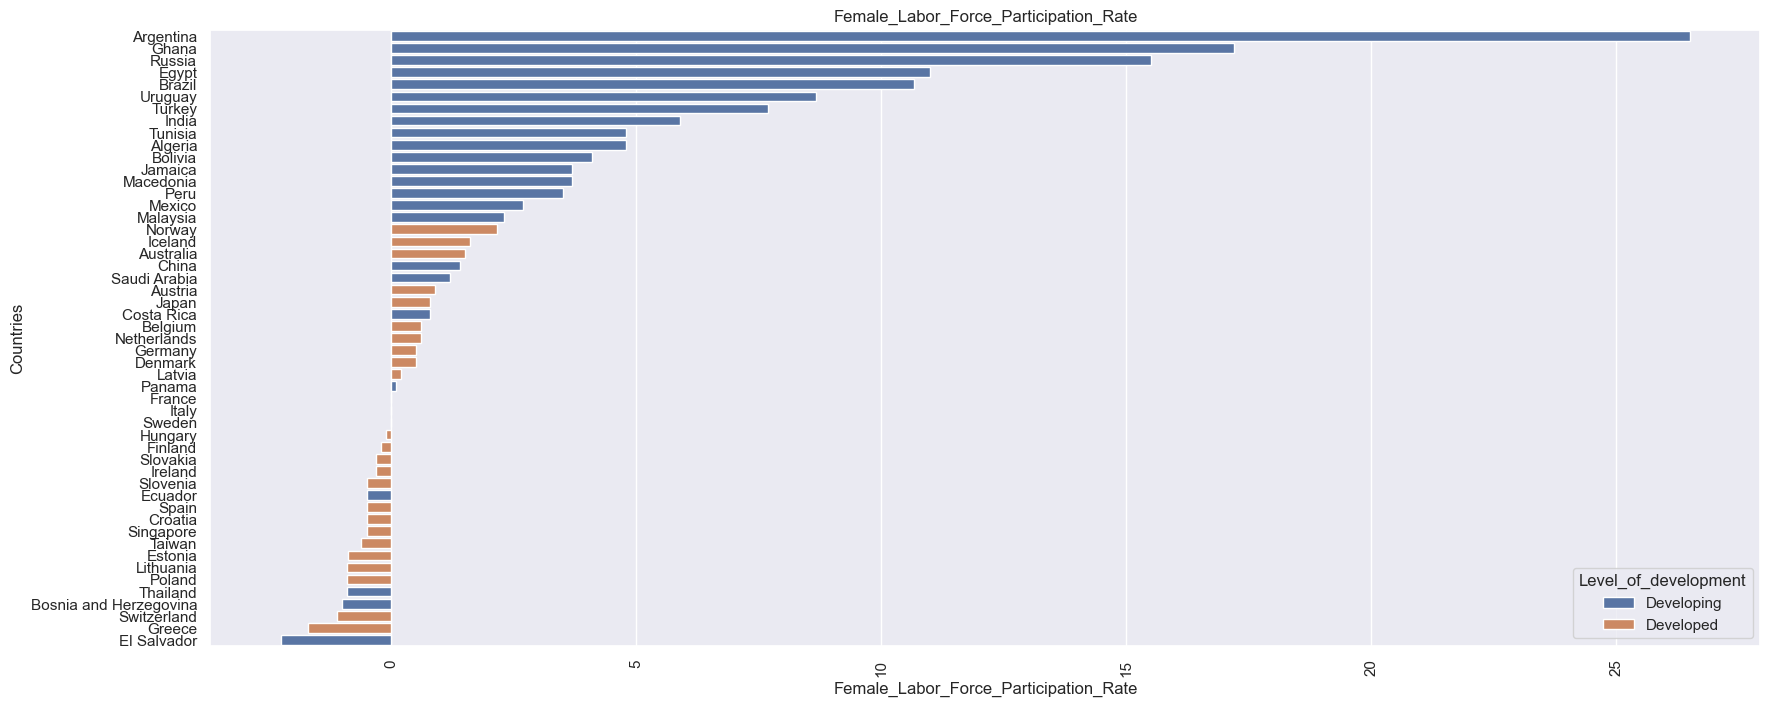

In [138]:
plt.figure(figsize=(20,8))
plt.title('Female_Labor_Force_Participation_Rate')
plt.xlabel('Female_Labor_Force_Participation_Rate')
plt.ylabel('Countries')
plt.xticks(rotation=90)
sns.barplot(data=df_labor_entp.sort_values(by='Inflation_rate', ascending=False),x='Inflation_rate',y='Country'
            ,hue='Level_of_development'
            ,orient='h'
            
)
plt.show()

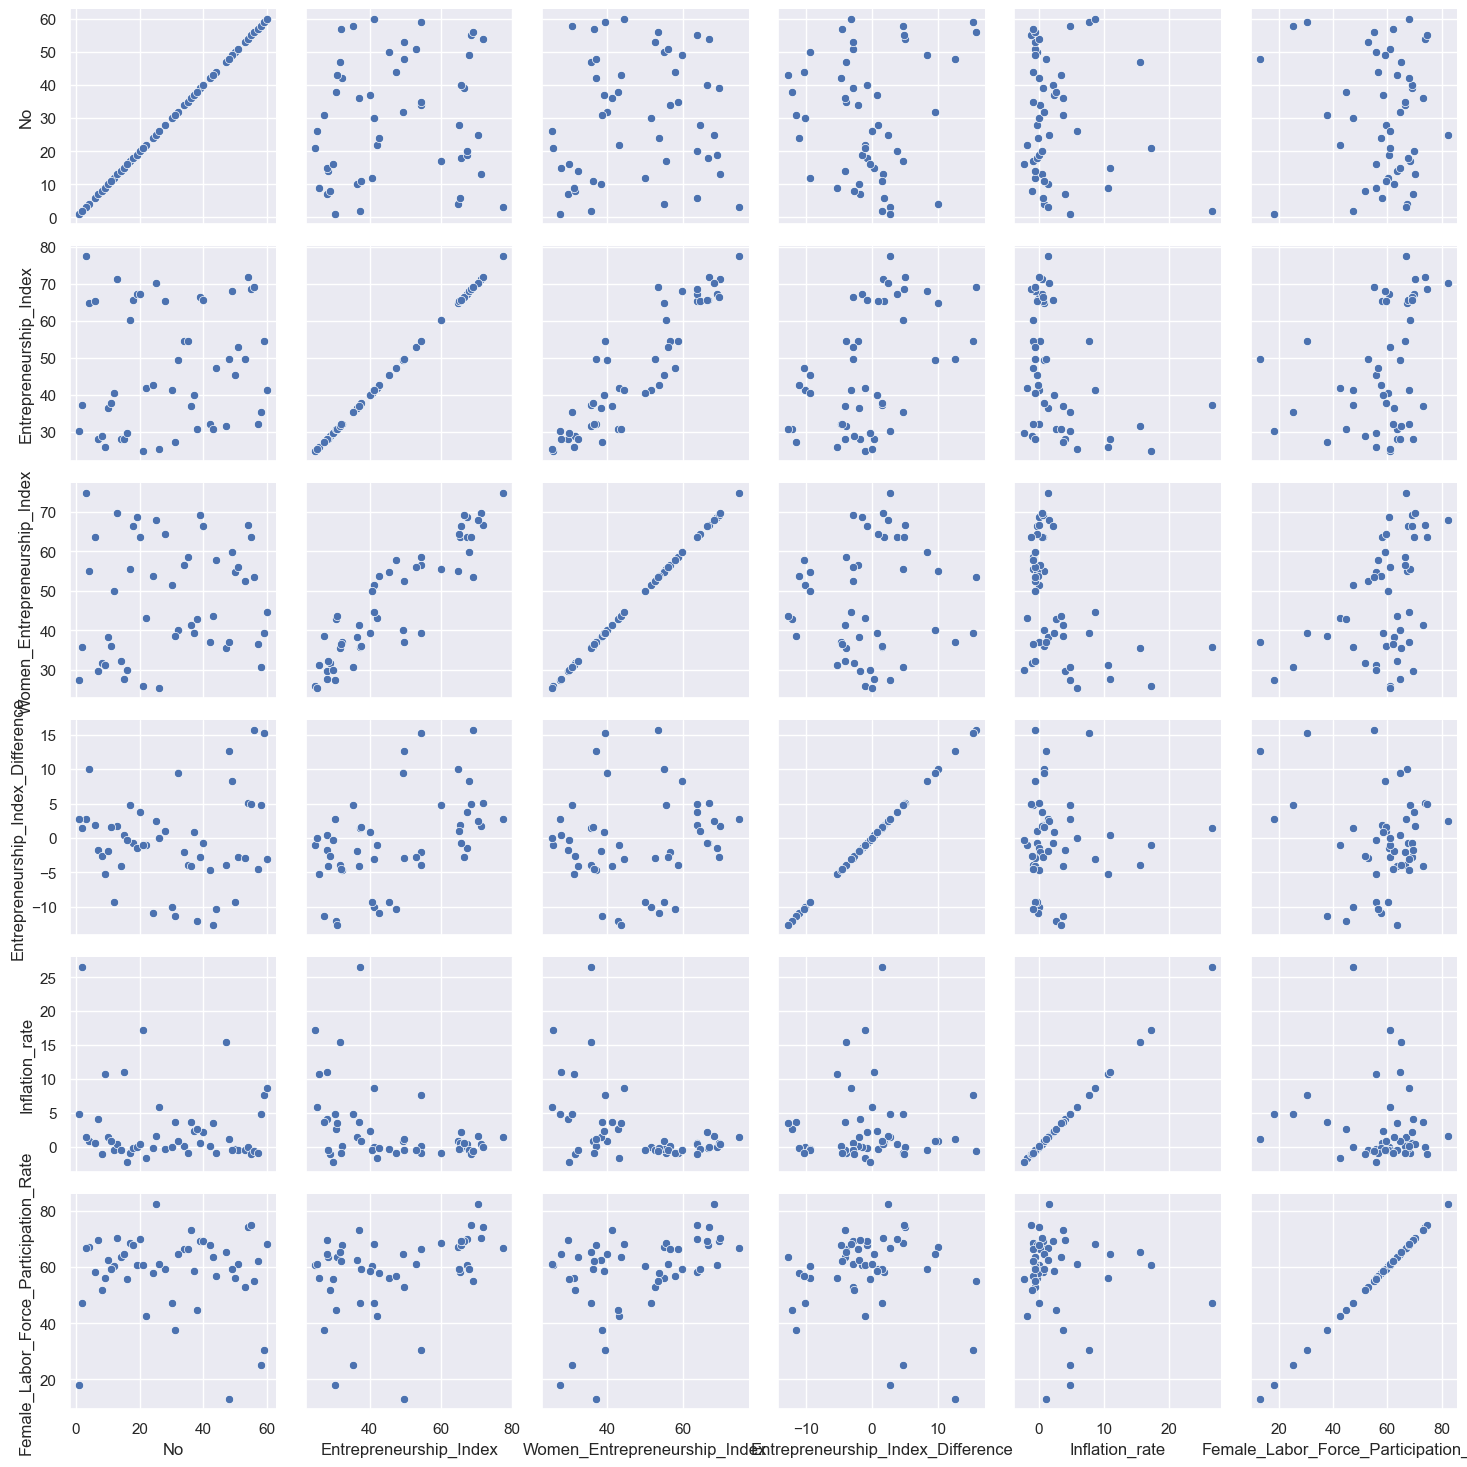

In [143]:
g = sns.PairGrid(df_labor_entp)
g.map(sns.scatterplot)

# Analysis Constrains
- From 2010 to Today In Developing Countries
- https://ourworldindata.org/female-labor-supply
- https://worldpopulationreview.com/country-rankings/developing-countries

In [144]:
df_developing_countries = read_csv('data\developing-countries-2024.csv')

In [146]:
df_developing_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   123 non-null    object 
 1   HdiTier                   122 non-null    object 
 2   Hdi2021                   123 non-null    float64
 3   WorldBankIncomeGroup2022  119 non-null    object 
 4   GniPerCapita2020          117 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.9+ KB


In [145]:
df_developing_countries.head()

,country,HdiTier,Hdi2021,WorldBankIncomeGroup2022,GniPerCapita2020
0,India,Medium,0.633,Lower-Middle Income,1920.0
1,China,High,0.768,Upper-Middle Income,10550.0
2,Indonesia,High,0.705,Lower-Middle Income,3870.0
3,Pakistan,Low,0.544,Lower-Middle Income,1270.0
4,Nigeria,Low,0.535,Lower-Middle Income,2000.0


In [152]:
developing_countries = df_developing_countries.iloc[:-1]['country']

In [161]:
# Getting the devoloping countries and after 2010
df_labor_force = df_labor_force_merged[df_labor_force_merged.Country.isin(developing_countries)].query('Year>=2010')

In [163]:
df_labor_force.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2760 entries, 20 to 6239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ISO3                             2760 non-null   object 
 1   Country                          2760 non-null   object 
 2   Year                             2760 non-null   int32  
 3   Continent                        2760 non-null   object 
 4   Hemisphere                       2760 non-null   object 
 5   HDI_Rank_(2021)                  2760 non-null   float64
 6   Labour_force_participation_rate  2520 non-null   float64
 7   Gender                           2760 non-null   object 
dtypes: float64(2), int32(1), object(5)
memory usage: 183.3+ KB


In [166]:
df_ratio_labor = df_ratio_labor[df_ratio_labor.Entity.isin(developing_countries)].query('Year>=2010')